<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Ознакомление-с-данными" data-toc-modified-id="Ознакомление-с-данными-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Ознакомление с данными</a></span></li><li><span><a href="#Предобработка--данных" data-toc-modified-id="Предобработка--данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Предобработка  данных</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Кодирование-и-масштабирование-признаков" data-toc-modified-id="Кодирование-и-масштабирование-признаков-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Кодирование и масштабирование признаков</a></span></li><li><span><a href="#Построение-моделей-типа-Логистическая-регрессия-и-Случайный-лес" data-toc-modified-id="Построение-моделей-типа-Логистическая-регрессия-и-Случайный-лес-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Построение моделей типа Логистическая регрессия и Случайный лес</a></span></li><li><span><a href="#Баланс-признаков" data-toc-modified-id="Баланс-признаков-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Баланс признаков</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

Данные о столбцах

- RowNumber — индекс строки в данных
- CustomerId — уникальный идентификатор клиента
- Surname — фамилия
- CreditScore — кредитный рейтинг
- Geography — страна проживания
- Gender — пол
- Age — возраст
- Tenure — сколько лет человек является клиентом банка
- Balance — баланс на счёте
- NumOfProducts — количество продуктов банка, используемых клиентом
- HasCrCard — наличие кредитной карты
- IsActiveMember — активность клиента
- EstimatedSalary — предполагаемая зарплата
- Exited — факт ухода клиента

# Цель проекта

Построить модель, которая предскажет уйдет клиент из банки или нет с метрикой F1 не менее 0,59.

# Задачи проекта

1. Провести ознакомление и предобработку данных
2. Закодировать категориальные признаки модели
3. Масштабировать признаки
4. Разбить данные на 3 выборки: обучающую, валидационную и тестовую
5. Проверить дисбаланс классов
6. Построить модель без учета и с учетом дисбаланса классов
7. Нивелировать дисбаланс классов с Использованием методов upsampling или downsampling и подбора пороговых значений
8. Проверить модель на адекватность с помощью метрики roc_auc_score

## Подготовка данных

### Ознакомление с данными

Ознакомимся с данными с помощью методов `info`, `head`, `duplicated`

In [1]:
!pip install scikit-learn==1.1.3



     |████████████████████████████████| 30.8 MB 43 kB/s  eta 0:00:01






  Attempting uninstall: scikit-learn

    Found existing installation: scikit-learn 0.24.1

    Uninstalling scikit-learn-0.24.1:

      Successfully uninstalled scikit-learn-0.24.1



In [2]:
!pip install skimpy
from skimpy import clean_columns





     |████████████████████████████████| 12.4 MB 1.9 MB/s eta 0:00:01



     |████████████████████████████████| 17.7 MB 29.4 MB/s eta 0:00:01    |███████████                     | 6.1 MB 29.4 MB/s eta 0:00:01███████████████████████▎      | 13.9 MB 29.4 MB/s eta 0:00:01



     |████████████████████████████████| 152 kB 47.2 MB/s eta 0:00:01



     |████████████████████████████████| 1.1 MB 70.7 MB/s eta 0:00:01:00:01






     |████████████████████████████████| 239 kB 74.1 MB/s eta 0:00:01








     |████████████████████████████████| 93 kB 608 kB/s  eta 0:00:01



     |████████████████████████████████| 3.1 MB 43.5 MB/s eta 0:00:01







     |████████████████████████████████| 117 kB 56.2 MB/s eta 0:00:01




     |████████████████████████████████| 282 kB 55.9 MB/s eta 0:00:01




















     |████████████████████████████████| 341 kB 67.9 MB/s eta 0:00:01



     |████████████████████████████████| 247 kB 88.7 MB/s eta 0:00:01






     |███████████████████████████████

In [61]:
#импортируем нужные библиотеки
import pandas as pd
from matplotlib import pyplot as plt  
import numpy as np
#импортируем модуль для кодирование данных
from sklearn.preprocessing import OneHotEncoder
#импортируем модуль для разделения данных на выборки
from sklearn.model_selection import train_test_split
#импортируем модуль для масштабирования признаков
from sklearn.preprocessing import StandardScaler
#импортируем модель случайного леса
from sklearn.ensemble import RandomForestClassifier
#импортируем модель логистической регрессии
from sklearn.linear_model import LogisticRegression
#импортируем метрики f1, precision, roc
from sklearn.metrics import f1_score, precision_score, roc_auc_score, recall_score
#импортируем модуль для перемешивания данных
from sklearn.utils import shuffle
#импортируем dummy модель
from sklearn.dummy import DummyClassifier

In [4]:
data = pd.read_csv('/datasets/Churn.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 10000 entries, 0 to 9999

Data columns (total 14 columns):

 #   Column           Non-Null Count  Dtype  

---  ------           --------------  -----  

 0   RowNumber        10000 non-null  int64  

 1   CustomerId       10000 non-null  int64  

 2   Surname          10000 non-null  object 

 3   CreditScore      10000 non-null  int64  

 4   Geography        10000 non-null  object 

 5   Gender           10000 non-null  object 

 6   Age              10000 non-null  int64  

 7   Tenure           9091 non-null   float64

 8   Balance          10000 non-null  float64

 9   NumOfProducts    10000 non-null  int64  

 10  HasCrCard        10000 non-null  int64  

 11  IsActiveMember   10000 non-null  int64  

 12  EstimatedSalary  10000 non-null  float64

 13  Exited           10000 non-null  int64  

dtypes: float64(3), int64(8), object(3)

memory usage: 1.1+ MB


In [5]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [6]:
data.duplicated().sum()

0

В ходе ознакомления с данными можно сделать следующие выводы:
- Требуется переименовать все столбцы, чтобы привести их в соответствис с правилами
- Дубликаты с данных отсутствуют
- Для столбца `Tenure` (сколько лет человек является клиентом банка) требуется выпыполнить несколько действий: заполнить пропуски и затем изменить тип данных на integer
- Для столбца `Exited` (факт ухода клиента из банка). Можно изменить тип данных на `bool`, но этого делать не будем, так как в перспективе возможено расширение этого столбца для дополнительных вариантов (например клиент хочет расторгнуть договор, но еще не расторг)



### Предобработка  данных

Сохраним новый датасет в переменную `data_good`

In [7]:
data_good = data

Переименуем названия столбцов и проверим резульатат переименования

In [8]:
data_good = clean_columns(data_good)
data_good.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 10000 entries, 0 to 9999

Data columns (total 14 columns):

 #   Column            Non-Null Count  Dtype  

---  ------            --------------  -----  

 0   row_number        10000 non-null  int64  

 1   customer_id       10000 non-null  int64  

 2   surname           10000 non-null  object 

 3   credit_score      10000 non-null  int64  

 4   geography         10000 non-null  object 

 5   gender            10000 non-null  object 

 6   age               10000 non-null  int64  

 7   tenure            9091 non-null   float64

 8   balance           10000 non-null  float64

 9   num_of_products   10000 non-null  int64  

 10  has_cr_card       10000 non-null  int64  

 11  is_active_member  10000 non-null  int64  

 12  estimated_salary  10000 non-null  float64

 13  exited            10000 non-null  int64  

dtypes: float64(3), int64(8), object(3)

memory usage: 1.1+ MB


data_good.columns = ['row_number', 
                     'customer_id', 
                     'surname', 
                     'credit_score',
                     'geography',
                     'gender', 
                     'age', 
                     'tenure', 
                     'balance', 
                     'num_of_products', 
                     'has_cr_card',
                     'is_active_member', 
                     'estimated_salary', 
                     'exited'
                    ]
data_good.info()

Проанализируем столблец `tenure`

In [9]:
data_good['tenure'].value_counts(dropna=False)

tenure
1.0     952
2.0     950
8.0     933
3.0     928
5.0     927
7.0     925
NaN     909
4.0     885
9.0     882
6.0     881
10.0    446
0.0     382
Name: count, dtype: int64

In [10]:
data_good['tenure'].describe()

count    9091.000000
mean        4.997690
std         2.894723
min         0.000000
25%         2.000000
50%         5.000000
75%         7.000000
max        10.000000
Name: tenure, dtype: float64

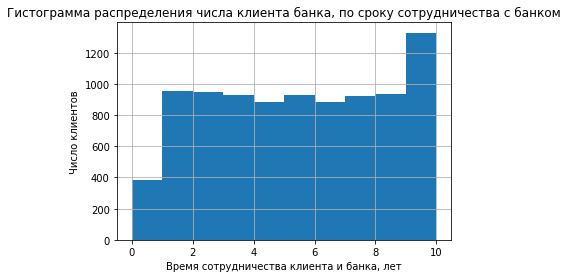

In [11]:
(
data_good['tenure']
    .plot(kind='hist', 
          bins=10,
          grid=True
         )
    .set(
        xlabel='Время сотрудничества клиента и банка, лет',
        ylabel='Число клиентов',
        title='Гистограмма распределения числа клиента банка, по сроку сотрудничества с банком'
    )
);

Средние значения и медиана практически равны. Заменим пропуски в столбце в `tenure` медианой и проверим выполнение

In [12]:
data_good['tenure'] = data_good['tenure'].fillna(data_good['tenure'].median())
data_good['tenure'].value_counts(dropna=False)

tenure
5.0     1836
1.0      952
2.0      950
8.0      933
3.0      928
7.0      925
4.0      885
9.0      882
6.0      881
10.0     446
0.0      382
Name: count, dtype: int64

In [13]:
data_good['tenure'] = data_good['tenure'].astype('int')
data_good.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 10000 entries, 0 to 9999

Data columns (total 14 columns):

 #   Column            Non-Null Count  Dtype  

---  ------            --------------  -----  

 0   row_number        10000 non-null  int64  

 1   customer_id       10000 non-null  int64  

 2   surname           10000 non-null  object 

 3   credit_score      10000 non-null  int64  

 4   geography         10000 non-null  object 

 5   gender            10000 non-null  object 

 6   age               10000 non-null  int64  

 7   tenure            10000 non-null  int64  

 8   balance           10000 non-null  float64

 9   num_of_products   10000 non-null  int64  

 10  has_cr_card       10000 non-null  int64  

 11  is_active_member  10000 non-null  int64  

 12  estimated_salary  10000 non-null  float64

 13  exited            10000 non-null  int64  

dtypes: float64(2), int64(9), object(3)

memory usage: 1.1+ MB


Пропуски в данных отсутствуют, данные проверены на дубликаты. Заполнены отсутствующие данные в столбце  `tenure` и изменен тип данных на `integer`

## Исследование задачи

В работе требуется предсказать уйдет клиент из банка или нет. Для решения этой задачи в датафреме есть лишние данные, которые не будут влиять на предсказание модели.
- номер строки `row_number`
- id клиента `customer_id`
- имя клиента `surname`

Удалим эти столбцы из данных 

In [14]:
data_good = data_good.drop(['row_number', 'customer_id', 'surname'], axis=1)
data_good.head(10)

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [15]:
data_good.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 10000 entries, 0 to 9999

Data columns (total 11 columns):

 #   Column            Non-Null Count  Dtype  

---  ------            --------------  -----  

 0   credit_score      10000 non-null  int64  

 1   geography         10000 non-null  object 

 2   gender            10000 non-null  object 

 3   age               10000 non-null  int64  

 4   tenure            10000 non-null  int64  

 5   balance           10000 non-null  float64

 6   num_of_products   10000 non-null  int64  

 7   has_cr_card       10000 non-null  int64  

 8   is_active_member  10000 non-null  int64  

 9   estimated_salary  10000 non-null  float64

 10  exited            10000 non-null  int64  

dtypes: float64(2), int64(7), object(2)

memory usage: 859.5+ KB


Удаление проведено успешно, другие данные не потеряны. Можно приступать к кодированию данных

### Кодирование и масштабирование признаков

Выделим целевой признак

In [22]:
#выделим целевой признак
data_good_target = data_good['exited']
#удалим целевой признак из данных
data_good_features = data_good.drop('exited', axis=1)

Разделим данные на обучающую, тестовую и валидационную выборки

In [23]:
#выделим обучающую выборку и валидационную с тестовой
features_train, features_valid, target_train, target_valid = \
train_test_split(data_good_features, data_good_target, test_size=0.4, random_state=12345)
#выделим валидационную выборку и тестовую выборку
features_test, features_valid, target_test, target_valid = \
train_test_split(features_valid, target_valid, test_size=0.5, random_state=12345)
#проверим полученные выборки
display("Размер обучающей выборки {:.2%}".format(features_train.shape[0]/data_good_features.shape[0]))
display("Размер валидационной выборки {:.2%}".format(features_valid.shape[0]/data_good_features.shape[0]))
display("Размер тестовой выборки {:.2%}".format(features_test.shape[0]/data_good_features.shape[0]))

'Размер обучающей выборки 60.00%'

'Размер валидационной выборки 20.00%'

'Размер тестовой выборки 20.00%'

Размер выборок соответствует размеру 60/20/20 для обучающей, валидационной и тестовой выборок соответственно

Закодируем признаки для построения модели.

- Используем технику OHE для столбцов `gender` и `geography`.

In [24]:
#создадим датафрем который содержат переменный типа object
#получим их него названия столбцов
#изменим тип данных на список
#проверим результат
ohe_features = features_train.select_dtypes(include='object').columns.to_list()
ohe_features

['geography', 'gender']

In [25]:
#создаем переменную кодировщик
encoder_ohe = OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False)
#обучаем кодировщика
encoder_ohe.fit(features_train[ohe_features])
#используем кодировщика
features_train[encoder_ohe.get_feature_names_out()] = encoder_ohe.transform(features_train[ohe_features])
#удалим столбцы, которые исопльовались для кодирования
features_train = features_train.drop(ohe_features, axis=1)
#проверяем выполнение
features_train

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_Germany,geography_Spain,gender_Male
7479,567,35,8,153137.74,1,1,0,88659.07,0.0,1.0,1.0
3411,711,37,8,113899.92,1,0,0,80215.20,0.0,0.0,0.0
6027,850,44,3,140393.65,2,0,1,186285.52,1.0,0.0,1.0
1247,512,24,6,0.00,2,1,0,37654.31,0.0,0.0,1.0
3716,665,27,2,147435.96,1,0,0,187508.06,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
4478,549,31,4,0.00,2,0,1,25684.85,0.0,0.0,1.0
4094,513,29,10,0.00,2,0,1,25514.77,0.0,0.0,1.0
3492,655,45,5,57327.04,1,0,1,47349.00,0.0,0.0,0.0
2177,667,24,4,0.00,2,0,1,34335.55,0.0,0.0,0.0


Прямое кодирование тренировочной выборки прошло успешно, закодируем остальные выборки

In [26]:
#кодируем валидационную выборку
features_valid[encoder_ohe.get_feature_names_out()] = encoder_ohe.transform(features_valid[ohe_features])
features_valid = features_valid.drop(ohe_features, axis=1)
#кодируем тестовую выборку
features_test[encoder_ohe.get_feature_names_out()] = encoder_ohe.transform(features_test[ohe_features])
features_test = features_test.drop(ohe_features, axis=1)
#проверяем
display(features_valid.head())
features_test.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_Germany,geography_Spain,gender_Male
7041,438,38,2,0.00,2,1,0,136859.55,0.0,0.0,1.0
5709,644,39,9,0.00,1,1,0,3740.93,0.0,0.0,0.0
7117,564,31,5,121461.87,1,1,1,20432.09,0.0,1.0,1.0
7775,628,40,10,0.00,2,1,0,103832.58,0.0,1.0,1.0
8735,728,30,10,114835.43,1,0,1,37662.49,0.0,0.0,1.0


,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_Germany,geography_Spain,gender_Male
8532,585,35,2,0.00,2,1,0,98621.04,0.0,0.0,0.0
5799,625,45,3,0.00,1,1,1,184474.15,0.0,0.0,0.0
5511,667,32,0,103846.65,1,1,0,20560.69,1.0,0.0,1.0
7365,568,36,10,153610.61,1,1,1,54083.80,0.0,1.0,0.0
7367,606,42,10,0.00,2,1,0,177938.52,0.0,1.0,1.0


Кодирование моделей проведено верно

Выполним масштабирование признаков.

In [27]:
numeric = ['credit_score', 'balance', 'estimated_salary', 'age']
#создаем структуру данных масштабирования признаков
scaler = StandardScaler()
#настраиваем структуру данных
scaler.fit(features_train[numeric])
#масштабируем признаки
features_train[numeric] = scaler.transform(features_train[numeric]) 
features_valid[numeric] = scaler.transform(features_valid[numeric]) 
features_test[numeric] = scaler.transform(features_test[numeric]) 
#Проверим выполнение масштабирование признаков для каждой из выборок
features_train.head()
display(features_train.head())
display(features_valid.head())
features_test.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_Germany,geography_Spain,gender_Male
7479,-0.886751,-0.373192,8,1.232271,1,1,0,-0.187705,0.0,1.0,1.0
3411,0.608663,-0.183385,8,0.600563,1,0,0,-0.333945,0.0,0.0,0.0
6027,2.052152,0.480939,3,1.027098,2,0,1,1.503095,1.0,0.0,1.0
1247,-1.457915,-1.417129,6,-1.233163,2,1,0,-1.071061,0.0,0.0,1.0
3716,0.130961,-1.132419,2,1.140475,1,0,0,1.524268,1.0,0.0,0.0


,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_Germany,geography_Spain,gender_Male
7041,-2.226392,-0.088482,2,-1.233163,2,1,0,0.647083,0.0,0.0,1.0
5709,-0.087120,0.006422,9,-1.233163,1,1,0,-1.658410,0.0,0.0,0.0
7117,-0.917905,-0.752805,5,0.722307,1,1,1,-1.369334,0.0,1.0,1.0
7775,-0.253277,0.101325,10,-1.233163,2,1,0,0.075086,0.0,1.0,1.0
8735,0.785204,-0.847708,10,0.615625,1,0,1,-1.070919,0.0,0.0,1.0


,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_Germany,geography_Spain,gender_Male
8532,-0.699824,-0.373192,2,-1.233163,2,1,0,-0.015173,0.0,0.0,0.0
5799,-0.284431,0.575842,3,-1.233163,1,1,1,1.471724,0.0,0.0,0.0
5511,0.151731,-0.657902,0,0.438711,1,1,0,-1.367107,1.0,0.0,1.0
7365,-0.876366,-0.278288,10,1.239884,1,1,1,-0.786517,0.0,1.0,0.0
7367,-0.481743,0.291132,10,-1.233163,2,1,0,1.358533,0.0,1.0,1.0


Масштабирование выполнено успешно

### Построение моделей типа Логистическая регрессия и Случайный лес

Обучим модель типа "Логистическая регрессия"

In [28]:
best_model_LogisticRegression = None
best_result_LR = 0
best_iter = 10
max_len_iter = 300
for m_iter in range(40, max_len_iter+1, 20):
    model = LogisticRegression(max_iter=m_iter, random_state=12345, solver='liblinear')
    model.fit(features_train, target_train)
    predictions = model.predict(features_valid)
    result = f1_score(target_valid, predictions)    
    print("Число итераций древа:", m_iter, "f1:", result)
    if result > best_result_LR:
        best_model_LogisticRegression = best_model_LogisticRegression
        best_result_LR = result
        best_iter = m_iter        
print()
print("f1 лучшей модели: {:.7n}".format(best_result_LR), "Лучшее число итераций:", best_iter)
print()

Число итераций древа: 40 f1: 0.27177700348432055

Число итераций древа: 60 f1: 0.27177700348432055

Число итераций древа: 80 f1: 0.27177700348432055

Число итераций древа: 100 f1: 0.27177700348432055

Число итераций древа: 120 f1: 0.27177700348432055

Число итераций древа: 140 f1: 0.27177700348432055

Число итераций древа: 160 f1: 0.27177700348432055

Число итераций древа: 180 f1: 0.27177700348432055

Число итераций древа: 200 f1: 0.27177700348432055

Число итераций древа: 220 f1: 0.27177700348432055

Число итераций древа: 240 f1: 0.27177700348432055

Число итераций древа: 260 f1: 0.27177700348432055

Число итераций древа: 280 f1: 0.27177700348432055

Число итераций древа: 300 f1: 0.27177700348432055



f1 лучшей модели: 0.271777 Лучшее число итераций: 40




Параметры модель типа "Логистическая регрессия":

- f1 лучшей модели: 0.27
- Лучшее число итераций: 40 

Модель типа "Логистическая регрессия" показала результат метрики f1 на валидационной выборке: 0,27, что существенно ниже требуемого 0,59 на тестовой выборке.

Протестируем модель типа "Случаный лес"

Обучим модель типа "Случаный лес"

In [29]:
best_model = None
best_result = 0
best_depth = 1
max_len_depth = 20
best_est = 1
max_est_est = 100
for est in range(10, max_est_est+1, 10):
    for depth in range(1, max_len_depth+1):
        model = RandomForestClassifier(n_estimators=est, max_depth=depth, random_state=12345)
        model.fit(features_train, target_train)
        predictions = model.predict(features_valid)
        result = f1_score(target_valid, predictions) 
        if result > best_result:
            best_model = model
            best_result = result
            best_depth = depth
            best_est = est
print()
print("f1 лучшей модели: {:.7n}".format(best_result), "Число деревьев при такой метрике f1", best_est, "Глубина древа при такой метрике f1:", best_depth)



f1 лучшей модели: 0.5512048 Число деревьев при такой метрике f1 30 Глубина древа при такой метрике f1: 17


Запомним гиперпараметры для модели типа "Случаный лес":

- f1 лучшей модели: 0.55
- Число деревьев при такой метрике f1: 30 
- Глубина древа при такой метрике f1: 17

### Баланс признаков

In [30]:
#проверим исходныхй баланс целевого признака
data_good_target.value_counts()

exited
0    7963
1    2037
Name: count, dtype: int64

Число клиентов, которые не хотят уйти из банка составляют 80% от всей выборки, а клиенты, которые хотят уйти из банка всего 20% от всей выборки. В следующем разделе следует увеличить число записей, для клиентов которые хотят уйти из банка, для более качественной модели

## Борьба с дисбалансом

В качестве первого шага обучим модели с включением парамента взвешивания классов `class_weight='balanced'`

Обучим модель типа "Логистическая регрессия"

In [31]:
best_model_LogisticRegression = None
best_result_LR = 0
best_iter = 10
max_len_iter = 300
for m_iter in range(40, max_len_iter+1, 20):
    model = LogisticRegression(class_weight='balanced', max_iter=m_iter, random_state=12345, solver='liblinear')
    model.fit(features_train, target_train)
    predictions = model.predict(features_valid)
    result = f1_score(target_valid, predictions)    
    print("Число итераций древа:", m_iter, "f1:", result)
    if result > best_result_LR:
        best_model_LogisticRegression = model
        best_result_LR = result
        best_iter = m_iter        
print()
print("f1 лучшей модели: {:.7n}".format(best_result_LR), "Лучшее число итераций:", best_iter)
print()

Число итераций древа: 40 f1: 0.4784110535405872

Число итераций древа: 60 f1: 0.4784110535405872

Число итераций древа: 80 f1: 0.4784110535405872

Число итераций древа: 100 f1: 0.4784110535405872

Число итераций древа: 120 f1: 0.4784110535405872

Число итераций древа: 140 f1: 0.4784110535405872

Число итераций древа: 160 f1: 0.4784110535405872

Число итераций древа: 180 f1: 0.4784110535405872

Число итераций древа: 200 f1: 0.4784110535405872

Число итераций древа: 220 f1: 0.4784110535405872

Число итераций древа: 240 f1: 0.4784110535405872

Число итераций древа: 260 f1: 0.4784110535405872

Число итераций древа: 280 f1: 0.4784110535405872

Число итераций древа: 300 f1: 0.4784110535405872



f1 лучшей модели: 0.4784111 Лучшее число итераций: 40




Наблюдаем скачок метрики f1 c 0.27 до 0.47

Обучим модель типа "Случаный лес"

In [33]:
best_model = None
best_result = 0
best_depth = 1
max_len_depth = 15
best_est = 1
max_est_est = 20
for est in range(4, max_est_est+1, 2):
    for depth in range(1, max_len_depth+1):
        model = RandomForestClassifier(class_weight='balanced', n_estimators=est, max_depth=depth, random_state=12345)
        model.fit(features_train, target_train)
        predictions = model.predict(features_valid)
        result = f1_score(target_valid, predictions) 
        if result > best_result:
            best_model = model
            best_result = result
            best_depth = depth
            best_est = est
print("f1 лучшей модели: {:.7n}".format(best_result), "Число деревьев при такой метрике f1:", best_est, "Глубина древа при такой метрике f1:", best_depth)

f1 лучшей модели: 0.6091476 Число деревьев при такой метрике f1: 10 Глубина древа при такой метрике f1: 7


Метрика f1 увеличилась по сравнению с предыдущей моделю примерно на 6%. с 0,551 до 0,609

Воспользуемся техникой `upsampling` для увеличения числа людей в выборке которые отказалсь от услуг банка.

Напишем функцию, которая увеличивает число людей, покинувших банк

In [34]:
#функция на вход принимает 2 массива данных: с остальными признаками и целевым признаком. И число повторений
def upsampling(features, target, repeat):
    #сохраняем целевой признак для 0 и 1
    target_zero = target[target == 0]
    target_ones = target[target == 1]
    #сохраняем индексы целевого признака с 0 и 1, чтобы использовать эти индексы для фильтрации остальных признаков
    target_zero_index = target_zero.index
    target_ones_index = target_ones.index   
    #ипользуем индексы целевого признака для фильтрации остальных признаков
    features_zero = features.query('credit_score.index in @target_zero_index')
    features_ones = features.query('credit_score.index in @target_ones_index')
    #увеличиваем число данных пользователей, который отказались от услуг банка
    features_upsampling = pd.concat([features_zero] + [features_ones] * repeat) 
    target_upsampling = pd.concat([target_zero] + [target_ones] * repeat)
    #перемешиваем данные
    features_upsampling = shuffle(features_upsampling, random_state=12345) 
    target_upsampling = shuffle(target_upsampling, random_state=12345) 
    #выводим данные
    return features_upsampling, target_upsampling    

Воспользуемся полученной функцией и увеличим число посетителей, которые покинули банк в 4 раз и проверим размеры датафрема при работе функции и при прямом увеличении.

In [35]:
features_train_upsampled, target_train_upsampled = upsampling(features_train, target_train, 4)
display('Размеры увеличенного датафрема при работе функции upsampling')
display('Размеры датафрема с обучающими признаками', features_train_upsampled.shape)
display('Размеры датафрема с целевыми признаками', target_train_upsampled.shape)
display('Размеры увеличенного датафрема при ручном увеличении', target_train[target_train == 1].count()*4 + target_train[target_train != 1].count())

'Размеры увеличенного датафрема при работе функции upsampling'

'Размеры датафрема с обучающими признаками'

(9588, 11)

'Размеры датафрема с целевыми признаками'

(9588,)

'Размеры увеличенного датафрема при ручном увеличении'

9588

Размеры совпадают, следовательно функция написана верно. Проверим баланс целевых признаков

In [36]:
target_train_upsampled.value_counts()

exited
0    4804
1    4784
Name: count, dtype: int64

После использования метода upsampling баланс сместился с 80/20 для целевого признака равного 0 и 1 соответственно

на 50/50 для целевого признака равного 0 и 1 соответственно

Обучим модель типа "Логистическая регрессия" на новых данных

In [37]:
best_model_LogisticRegression = None
best_result_LR = 0
best_iter = 10
max_len_iter = 300
for m_iter in range(40, max_len_iter+1, 20):
    model = LogisticRegression(class_weight='balanced', max_iter=m_iter, random_state=12345, solver='liblinear')
    model.fit(features_train_upsampled, target_train_upsampled)
    predictions = model.predict(features_valid)
    result = f1_score(target_valid, predictions)    
    print("Число итераций древа:", m_iter, "f1:", result)
    if result > best_result_LR:
        best_model_LogisticRegression = model
        best_result_LR = result
        best_iter = m_iter        
print()
print("f1 лучшей модели: {:.7n}".format(best_result_LR), "Лучшее число итераций:", best_iter)
print()

Число итераций древа: 40 f1: 0.4775086505190312

Число итераций древа: 60 f1: 0.4775086505190312

Число итераций древа: 80 f1: 0.4775086505190312

Число итераций древа: 100 f1: 0.4775086505190312

Число итераций древа: 120 f1: 0.4775086505190312

Число итераций древа: 140 f1: 0.4775086505190312

Число итераций древа: 160 f1: 0.4775086505190312

Число итераций древа: 180 f1: 0.4775086505190312

Число итераций древа: 200 f1: 0.4775086505190312

Число итераций древа: 220 f1: 0.4775086505190312

Число итераций древа: 240 f1: 0.4775086505190312

Число итераций древа: 260 f1: 0.4775086505190312

Число итераций древа: 280 f1: 0.4775086505190312

Число итераций древа: 300 f1: 0.4775086505190312



f1 лучшей модели: 0.4775087 Лучшее число итераций: 40




Увеличение размера выборки не дало результатов и даже ухудшило метрика на 0,001

Обучим модель типа " Случаный лес" на новых данных

In [38]:
best_model = None
best_result = 0
best_depth = 1
max_len_depth = 15
best_est = 1
max_est_est = 30
for est in range(4, max_est_est+1, 2):
    for depth in range(1, max_len_depth+1):
        model = RandomForestClassifier(class_weight='balanced', n_estimators=est, max_depth=depth, random_state=12345)
        model.fit(features_train_upsampled, target_train_upsampled)
        predictions = model.predict(features_valid)
        result = f1_score(target_valid, predictions) 
        if result > best_result:
            best_model = model
            best_result = result
            best_depth = depth
            best_est = est
            #best_multiplier = multiplier
print("f1 лучшей модели: {:.7n}".format(best_result), "| Число деревьев при такой метрике f1:", best_est, "| Глубина древа при такой метрике f1:", best_depth)            

f1 лучшей модели: 0.618219 | Число деревьев при такой метрике f1: 28 | Глубина древа при такой метрике f1: 9


После увеличения размера выборки общее качество метрики f1 увеличилось примерно с 0.609 до 0.618, то есть примерно 1%

Число деревьев при такой метрике f1: 28 | Глубина древа при такой метрике f1: 9

#Поробуем изменить порог данных
probabilities_valid = best_model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

for threshold in np.arange(0, 0.8, 0.02):
    predicted_valid = probabilities_one_valid > threshold 
    precision = precision_score(target_valid, predicted_valid)
    f1 = f1_score(target_valid, predicted_valid)    
    print("Порог = {:.2f} | Точность = {:.3f}, f1 = {:.3f}".format(threshold, precision, f1))
К сожалению изменение порога никак не увиличивают метрику f1. Метрика f1 остается на том же уровне

## Тестирование модели

Протестируем обученные модели на тестовых данных

In [54]:
predictions = best_model_LogisticRegression.predict(features_test)
result_f1 = f1_score(target_test, predictions)
result_recall = recall_score(target_test, predictions) 
display("Для модели типа логистическая регрессия Метрика F1 - {:.2%}".format(result_f1), "Метрика recall - {:.2%}".format(result_recall))


'Для модели типа логистическая регрессия Метрика F1 - 48.89%'

'Метрика recall - 68.18%'

Модель типа "Логистическая регрессия" показала метрику f1 в 0.489 что меньше требуемой метрики в 0.59. А метрика recall на уровне 0.68, то есть модель с точностью 68% предсказывает отток клиентов из банка

In [55]:
predictions = best_model.predict(features_test)
result_f1 = f1_score(target_test, predictions) 
result_recall = recall_score(target_test, predictions) 
result_recall
display("Для модели типа случаный лес Метрика F1 - {:.2%}".format(result_f1), "Метрика recall - {:.2%}".format(result_recall))


'Для модели типа случаный лес Метрика F1 - 61.12%'

'Метрика recall - 69.38%'

Модель типа "Случаный лес" показала метрику f1 в 0.6111 что является удовлетворительным результатом.  А метрика recall на уровне 0.69, то есть модель с точностью 69% предсказывает отток клиентов из банка

In [60]:
dummy_model = DummyClassifier(strategy='constant', constant=1)
dummy_model.fit(features_train_upsampled, target_train_upsampled)
result_f1 = f1_score(dummy_model.predict(features_test), target_test)
result_recall = recall_score(dummy_model.predict(features_test), target_test)
display("Для dummy модели Метрика F1 - {:.2%}".format(result_f1), "Метрика recall - {:.2%}".format(result_recall))


'Для dummy модели Метрика F1 - 34.57%'

'Метрика recall - 20.90%'

Обученные модели предсказывают результат лучше случайной модели примерно в 2 раза

Проверим модель на адекватность с использованием метрики `roc_auc_score`

In [43]:
probabilities_valid = best_model.predict_proba(features_test)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_test, probabilities_one_valid)
auc_roc

0.8480573920722966

Модель показала значение ~0,85, что на 0,35 выше чем случайная модель с вероятностью предсказания 50%

# Выводы по проекту

В проекты требовалось построить модель, которая предсказывает откажется клиент от услуг банка или нет с метрикой F1 не менее 0.59 на тестовой выборке.

Для построения модели выполнена подготовительная работа по предобработке, кодировке и затем разбитию данных на 3 выборки: обучающую, валидационную и тестовую.

Кроме того выполнена проверка на дисбаланс классов и построена модель БЕЗ учета баланса классов.
- Баланс классов для исходных данных составил 80% для целевого признака равного 0, и 20% для 1.
- Построена модель без учета баланса классов показала метрику F1 равной 0.55 на валидационной выборке.

Протестирован метод масштабирования данных, однако метрика F1 не изменилась и он и был исключен из проекта.

Для получения лучшей модели выполнена балансировка классов. 
- Построена модель с учетом "веса класса". Она показала увеличение метрики F1 на 6%, по сравнению с предыдущей моделью.
- Затем бы применен метод `upsampling` для увеличения размера выборки для положительного класса.
- После использования метода upsampling баланс сместился с 80/20 для целевого признака равного 0 и 1 соответственно на 50/50.
- Увеличение размера выборки позволило увеличить метрику F1 на 1% по сравнению с предыдущей моделью

В результате проекта получена модель типа "Случайный лес", которая предсказывает откажется клиент от услуг банка или нет с метрикой F1 - 0.61 на тестовой выборке.

Также проведена проверка модели на адекватность с помощью метрики roc_auc_score. Модель показала результат метрики 0.85, что на 0.35 выше модели, которая предсказывает ответ с 50% вероятностью 

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 3: учтён дисбаланс
    - [x]  Применено несколько способов борьбы с дисбалансом
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 4: проведено тестирование
- [x]  Удалось достичь *F1*-меры не менее 0.59
- [x]  Исследована метрика *AUC-ROC*